# Lab1 Dogs V.S. Cats

In [14]:
import os
import zipfile
from urllib.request import urlretrieve
from IPython.display import Image, display

# Define the URL of the zip file
zip_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# Define the directory to extract the contents
extracted_dir = '/content/dataset'  # You can change this directory if needed

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Download the zip file
zip_file_path, _ = urlretrieve(zip_url, '/content/dataset/cats_and_dogs_filtered.zip')

# Extract the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List the extracted files
extracted_files = os.listdir(extracted_dir)

In [2]:
import os

target_folder = extracted_dir+'/cats_and_dogs_filtered'
train_cat_dir = os.path.join(f'{target_folder}/train/cats')
train_dog_dir = os.path.join(f'{target_folder}/train/dogs')
val_cat_dir = os.path.join(f'{target_folder}/validation/cats')
val_dog_dir = os.path.join(f'{target_folder}/validation/dogs')
train_cat_files = [os.path.join(train_cat_dir, file) for file in os.listdir(train_cat_dir) if
                    os.path.isfile(os.path.join(train_cat_dir, file))]
train_dog_files = [os.path.join(train_dog_dir, file) for file in os.listdir(train_dog_dir) if
                    os.path.isfile(os.path.join(train_dog_dir, file))]
val_cat_files = [os.path.join(val_cat_dir, file) for file in os.listdir(val_cat_dir) if
                  os.path.isfile(os.path.join(val_cat_dir, file))]
val_dog_files = [os.path.join(val_dog_dir, file) for file in os.listdir(val_dog_dir) if
                  os.path.isfile(os.path.join(val_dog_dir, file))]
print(f'total train cat {train_cat_dir} images {len(train_cat_files)}')
print(f'total train dog {train_dog_dir} images {len(train_dog_files)}')
print(f'total val cat {val_cat_dir} images {len(val_cat_files)}')
print(f'total val dog {val_dog_dir} images {len(val_dog_files)}')

total train cat /content/dataset/cats_and_dogs_filtered/train/cats images 1000
total train dog /content/dataset/cats_and_dogs_filtered/train/dogs images 1000
total val cat /content/dataset/cats_and_dogs_filtered/validation/cats images 500
total val dog /content/dataset/cats_and_dogs_filtered/validation/dogs images 500


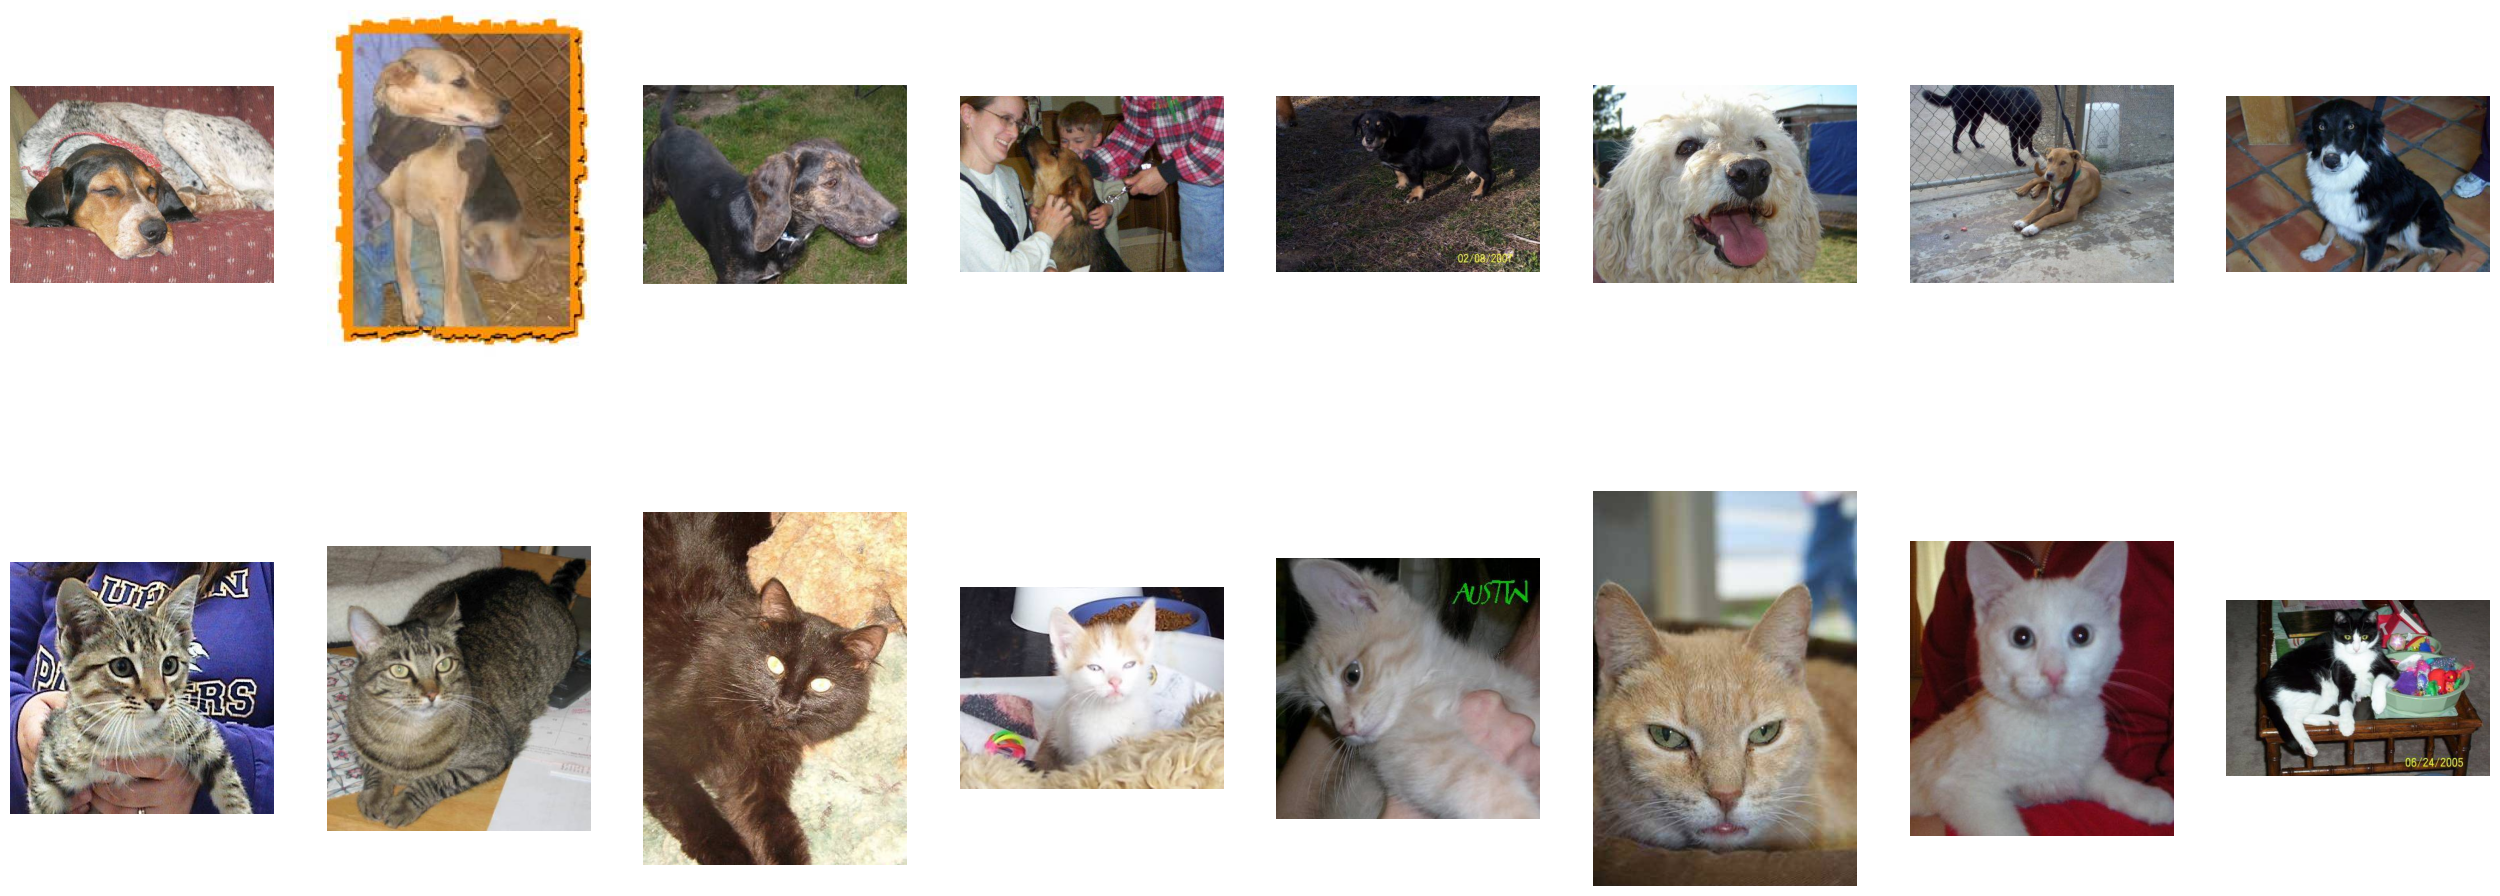

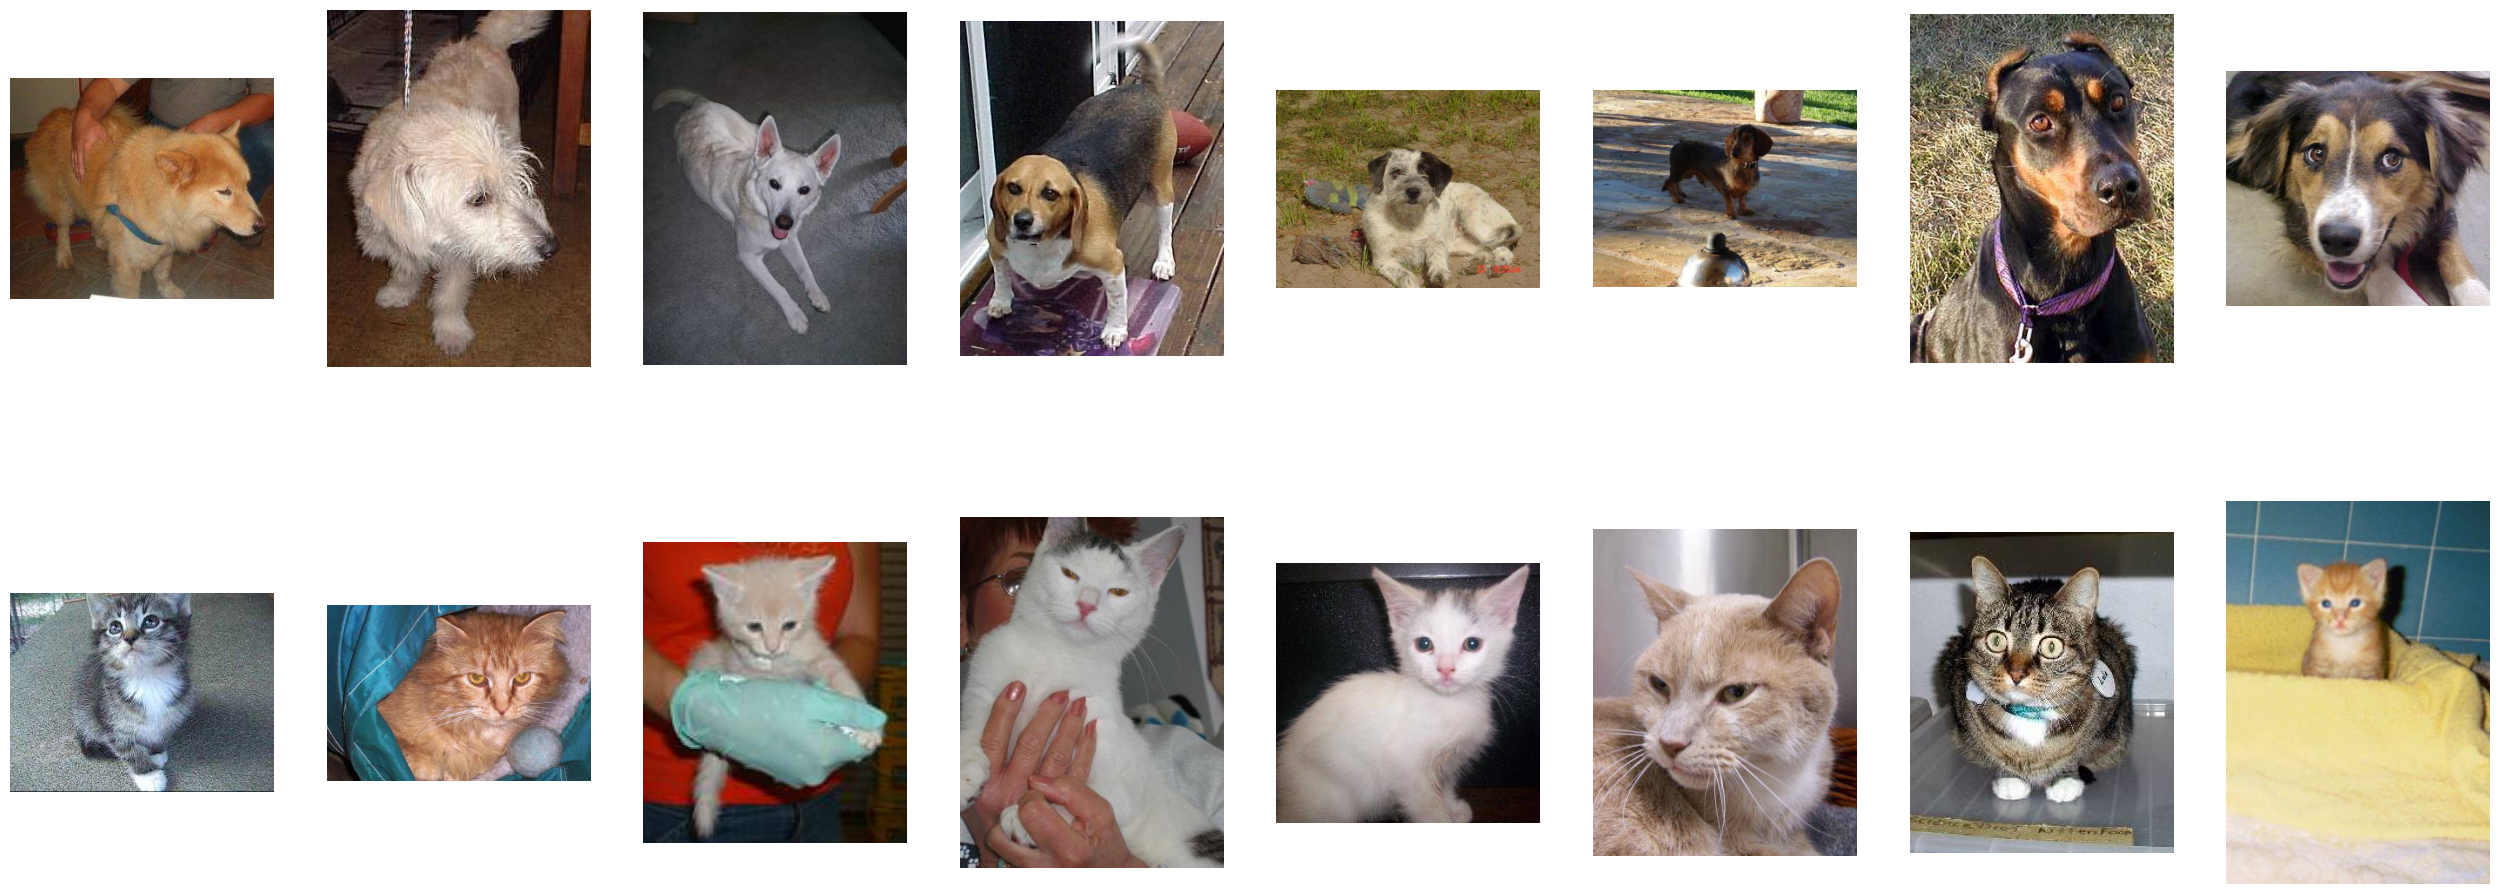

In [3]:
import array
import os
import zipfile

import keras
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img
from keras.src.callbacks import History

def random_display_images(dog_files: array, cat_files: array):
    global f, axs, i
    # list random 8 images for each
    f, axs = plt.subplots(2, 8, figsize=(32, 12))
    for (i, horse_file, human_file) in zip(range(0, 8), np.random.choice(dog_files, size=8),
                                           np.random.choice(cat_files, size=8)):
        axs[0, i].axis('off')
        axs[1, i].axis('off')
        axs[0, i].imshow(matplotlib.image.imread(horse_file))
        axs[1, i].imshow(matplotlib.image.imread(human_file))
    plt.show()

random_display_images(train_dog_files, train_cat_files)
random_display_images(val_dog_files, val_cat_files)

In [30]:
import os

import keras
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_img_dir = extracted_dir+'/cats_and_dogs_filtered/train'
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    train_img_dir,
    target_size=(150, 150),  # all images will be resized to 150*150
    batch_size=20,
    class_mode='binary'  # dog or cat, so binary
)
# validation generator
val_img_dir = extracted_dir+'/cats_and_dogs_filtered/validation'
val_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    val_img_dir,
    target_size=(150, 150),  # all images will be resized to 150*150
    batch_size=20,
    class_mode='binary'  # dog or cat, so binary
)

# build the model
model = keras.models.Sequential([
    # the first convolution, 150px*150px with 3 bytes color
    keras.layers.Conv2D(16, (3, 3), activation=keras.activations.relu,
                        input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    # the second convolution
    keras.layers.Conv2D(32, (3, 3), activation=keras.activations.relu),
    keras.layers.MaxPooling2D(2, 2),
    # the third convolution
    keras.layers.Conv2D(128, (3, 3), activation=keras.activations.relu),
    keras.layers.MaxPooling2D(2, 2),
    # the forth convolution
    keras.layers.Conv2D(128, (3, 3), activation=keras.activations.relu),
    keras.layers.MaxPooling2D(2, 2),
    # the fifth convolution
    keras.layers.Conv2D(128, (3, 3), activation=keras.activations.relu),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)])

print(model.summary())

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

# train the model
history = model.fit(train_generator, steps_per_epoch=100, epochs=100, verbose=1, validation_data=val_generator,
                    validation_steps=8)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_569 (Conv2D)         (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_570 (Conv2D)         (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_571 (Conv2D)         (None, 34, 34, 128)       36992     
                                    

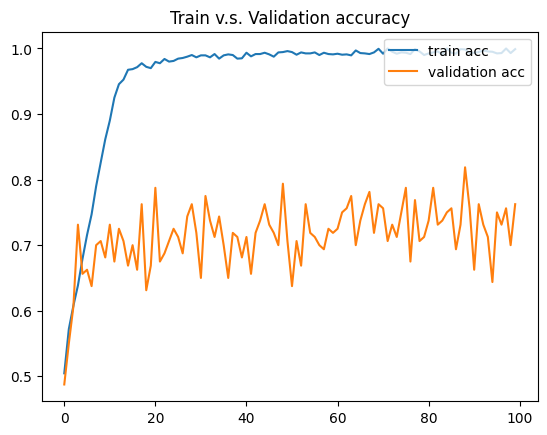

<Figure size 640x480 with 0 Axes>

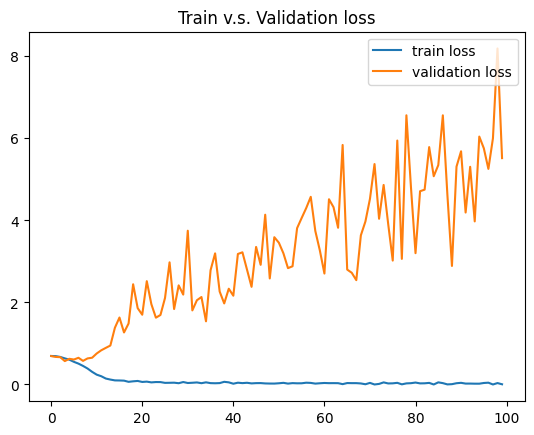

<Figure size 640x480 with 0 Axes>

In [5]:
def show_model_history(history: History):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    # display the  accuracy
    plt.plot(epochs, acc, label='train acc')
    plt.plot(epochs, val_acc, label='validation acc')
    plt.title('Train v.s. Validation accuracy')
    plt.legend(loc='upper right')
    plt.figure()
    plt.show()
    # display the  loss
    plt.plot(epochs, loss, label='train loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.title('Train v.s. Validation loss')
    plt.legend(loc='upper right')
    plt.figure()
    plt.show()

show_model_history(model.history)

In [6]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for fn in uploaded.keys():
  # predicting images
  path='/content/'+fn
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])

  classes = model.predict(images)
  print(classes)
  if classes[0]>0.5:
    print('dog')
  else:
    print('cat')

Saving cat-1.png to cat-1.png
Saving cat-2.png to cat-2.png
Saving cat-3.png to cat-3.png
Saving dog-1.png to dog-1.png
Saving dog-2.png to dog-2.png
Saving dog-3.png to dog-3.png
Saving dog-4.png to dog-4.png
1/1 [==============================] - 0s 410ms/step
[[1.]]
dog
1/1 [==============================] - 0s 18ms/step
[[0.9999994]]
dog
1/1 [==============================] - 0s 16ms/step
[[0.9993598]]
dog
1/1 [==============================] - 0s 17ms/step
[[7.421383e-05]]
cat
1/1 [==============================] - 0s 19ms/step
[[1.]]
dog
1/1 [==============================] - 0s 20ms/step
[[1.]]
dog
1/1 [==============================] - 0s 17ms/step
[[1.]]
dog


# Lab1 Transfer Learning

In [7]:
import os
import zipfile
from urllib.request import urlretrieve
from IPython.display import Image, display

# Define the URL of the zip file
zip_url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Define the directory to extract the contents
extracted_dir = '/content/model'  # You can change this directory if needed

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Download the zip file
pre_trained_model_file, _ = urlretrieve(zip_url, '/content/model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

print(f'file size: {os.path.getsize(pre_trained_model_file)/1024/1024} MB')

file size: 83.83843231201172 MB


In [36]:
from keras.applications.inception_v3 import InceptionV3
from keras import layers,Model

pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3),
    include_top=False,
    weights=None
)

pre_trained_model.load_weights(pre_trained_model_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

print(pre_trained_model.summary())
last_layer = pre_trained_model.get_layer('mixed7')
#print(f'output shape {last_layer.output_shape}')
last_output = last_layer.output

#add Dense layer
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation=keras.activations.relu)(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation=keras.activations.sigmoid)(x)

model = Model(pre_trained_model.inputs, x)
#print(model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_574 (Conv2D)         (None, 74, 74, 32)           864       ['input_7[0][0]']             
                                                                                                  
 batch_normalization_564 (B  (None, 74, 74, 32)           96        ['conv2d_574[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_564 (Activation  (None, 74, 74, 32)           0         ['batch_normalizati

In [37]:
import os

import keras
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_img_dir = extracted_dir+'/cats_and_dogs_filtered/train'
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    train_img_dir,
    target_size=(150, 150),  # all images will be resized to 150*150
    batch_size=20,
    class_mode='binary'  # dog or cat, so binary
)
# validation generator
val_img_dir = extracted_dir+'/cats_and_dogs_filtered/validation'
val_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    val_img_dir,
    target_size=(150, 150),  # all images will be resized to 150*150
    batch_size=20,
    class_mode='binary'  # dog or cat, so binary
)

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

# train the model
history = model.fit(train_generator, steps_per_epoch=10, epochs=100, verbose=1, validation_data=val_generator,
                    validation_steps=8)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
10/10 [==============================] - 5s 245ms/step - loss: 8.0106 - accuracy: 0.7000 - val_loss: 0.4605 - val_accuracy: 0.8625
Epoch 2/100
10/10 [==============================] - 1s 120ms/step - loss: 0.2990 - accuracy: 0.9200 - val_loss: 0.3353 - val_accuracy: 0.9000
Epoch 3/100
10/10 [==============================] - 1s 116ms/step - loss: 0.1649 - accuracy: 0.9450 - val_loss: 0.1477 - val_accuracy: 0.9312
Epoch 4/100
10/10 [==============================] - 1s 75ms/step - loss: 0.4439 - accuracy: 0.9050 - val_loss: 0.2109 - val_accuracy: 0.9375
Epoch 5/100
10/10 [==============================] - 1s 108ms/step - loss: 0.0627 - accuracy: 0.9800 - val_loss: 0.2080 - val_accuracy: 0.9250
Epoch 6/100
10/10 [==============================] - 1s 109ms/step - loss: 0.1554 - accuracy: 0.9550 - val_loss: 0.1648 - val_accuracy: 0.9438
Epoch 7/100
10/10 [==============================] - 1s 111

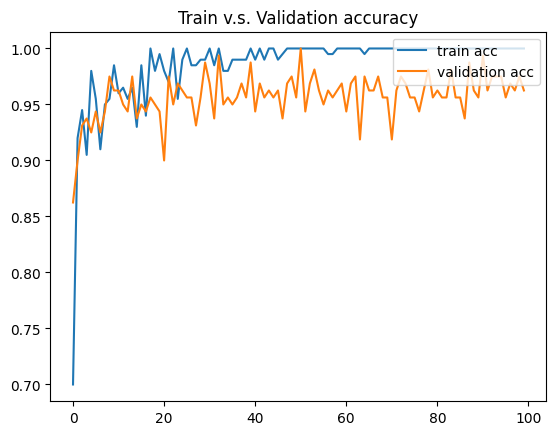

<Figure size 640x480 with 0 Axes>

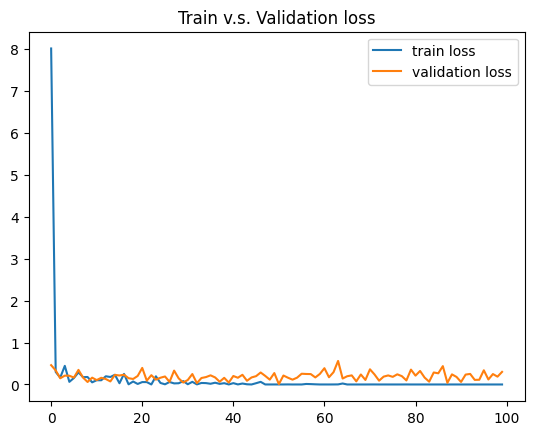

<Figure size 640x480 with 0 Axes>

In [38]:
def show_model_history(history: History):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    # display the  accuracy
    plt.plot(epochs, acc, label='train acc')
    plt.plot(epochs, val_acc, label='validation acc')
    plt.title('Train v.s. Validation accuracy')
    plt.legend(loc='upper right')
    plt.figure()
    plt.show()
    # display the  loss
    plt.plot(epochs, loss, label='train loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.title('Train v.s. Validation loss')
    plt.legend(loc='upper right')
    plt.figure()
    plt.show()

show_model_history(model.history)

In [39]:
import numpy as np
import os
import fnmatch

from google.colab import files
from keras.preprocessing import image

#uploaded=files.upload().keys()
uploaded=os.listdir('/content')
for fn in uploaded:
  if fnmatch.fnmatch(fn, '*.png'):
    # predicting images
    print(fn)
    path='/content/'+fn
    img=image.load_img(path,target_size=(150,150))
    x=image.img_to_array(img)
    x /= 255
    x=np.expand_dims(x,axis=0)
    images = np.vstack([x])

    classes = model.predict(images)
    print(classes)
    if classes[0]>0.5:
      print('dog')
    else:
      print('cat')

dog-3.png
1/1 [==============================] - 1s 908ms/step
[[1.]]
dog
dog-4.png
1/1 [==============================] - 0s 37ms/step
[[0.91160953]]
dog
dog-2.png
1/1 [==============================] - 0s 35ms/step
[[1.]]
dog
cat-2.png
1/1 [==============================] - 0s 36ms/step
[[4.771715e-06]]
cat
cat-3.png
1/1 [==============================] - 0s 39ms/step
[[2.3122237e-10]]
cat
cat-1.png
1/1 [==============================] - 0s 37ms/step
[[6.4750267e-18]]
cat
dog-1.png
1/1 [==============================] - 0s 35ms/step
[[1.]]
dog
